<a href="https://colab.research.google.com/github/Sanim27/Transfer_Learn_catvsdog/blob/main/Transfer_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
!kaggle datasets list -s 'dogs vs cats'

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 398, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content. Or use the environment method.


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:09<00:00, 99.6MB/s]
100% 1.06G/1.06G [00:09<00:00, 115MB/s] 


In [ ]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [ ]:
conv_base=VGG16(
    weights= 'imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
conv_base.trainable=False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
#generators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalize
def process(image,label):
  image=tensorflow.cast(image/255 ,tensorflow.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 100ms/step - loss: 0.2631 - accuracy: 0.8856 - val_loss: 0.2239 - val_accuracy: 0.9044
Epoch 2/10
625/625 [==============================] - 55s 87ms/step - loss: 0.1896 - accuracy: 0.9200 - val_loss: 0.2185 - val_accuracy: 0.9082
Epoch 3/10
625/625 [==============================] - 55s 88ms/step - loss: 0.1623 - accuracy: 0.9315 - val_loss: 0.2096 - val_accuracy: 0.9138
Epoch 4/10
625/625 [==============================] - 56s 88ms/step - loss: 0.1278 - accuracy: 0.9482 - val_loss: 0.2581 - val_accuracy: 0.8942
Epoch 5/10
625/625 [==============================] - 65s 103ms/step - loss: 0.1090 - accuracy: 0.9553 - val_loss: 0.2366 - val_accuracy: 0.9116
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.0839 - accuracy: 0.9665 - val_loss: 0.2516 - val_accuracy: 0.9116
Epoch 7/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0584 - accuracy: 0.9785 - val_loss: 0.3900 - val_accura

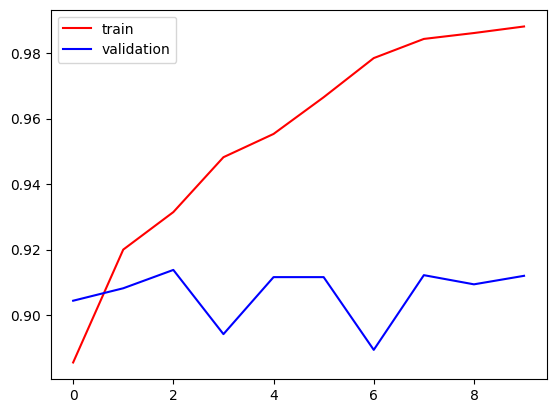

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label= 'validation')
plt.legend()
plt.show()

the model has overfit the data

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
batch_size=32
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    directory='/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)
validation_generator= test_datagen.flow_from_directory(
    directory='/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

<ipython-input-27-b0cf7ca3fffe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
625/625 [==============================] - 156s 249ms/step - loss: 0.2037 - accuracy: 0.9170 - val_loss: 0.2329 - val_accuracy: 0.9084
Epoch 2/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1769 - accuracy: 0.9260 - val_loss: 0.2115 - val_accuracy: 0.9128
Epoch 3/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1619 - accuracy: 0.9333 - val_loss: 0.2093 - val_accuracy: 0.9136
Epoch 4/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1556 - accuracy: 0.9359 - val_loss: 0.2113 - val_accuracy: 0.9174
Epoch 5/10
625/625 [==============================] - 162s 260ms/step - loss: 0.1474 - accuracy: 0.9395 - val_loss: 0.2202 - val_accuracy: 0.9152
Epoch 6/10
625/625 [==============================] - 154s 247ms/step - loss: 0.1356 - accuracy: 0.9457 - val_loss: 0.2217 - val_accuracy: 0.9160
Epoch 7/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1367 - accuracy: 0.9442 - val_loss: 0.2273 -

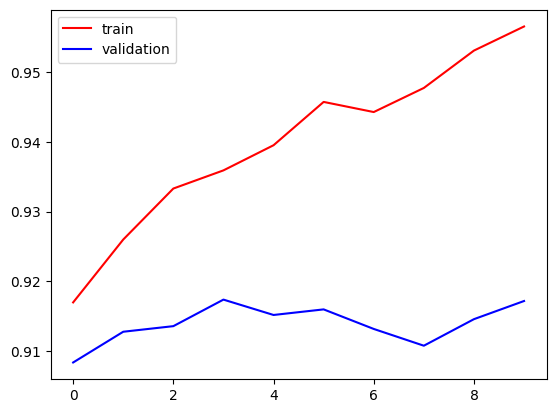

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label= 'validation')
plt.legend()
plt.show()